In [71]:
import pandas as pd
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K

In [72]:
# load data
df = pd.read_csv("https://raw.githubusercontent.com/MacounVladimir/UIN/main/winequality-red.csv", sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [74]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<Axes: >

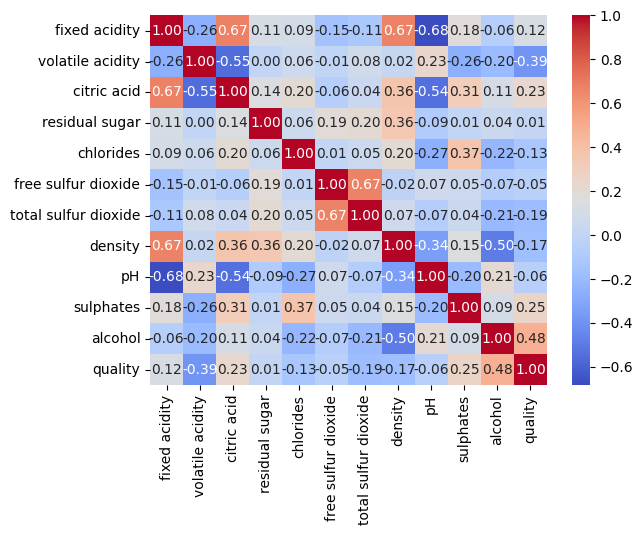

In [75]:
correlation = df.corr()
sns.heatmap(correlation, annot = True, fmt = '.2f', cmap = 'coolwarm')

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>,
        <Axes: title={'center': 'residual sugar'}>],
       [<Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>,
        <Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>],
       [<Axes: title={'center': 'pH'}>,
        <Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>],
       [<Axes: title={'center': 'prumer hodnot'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

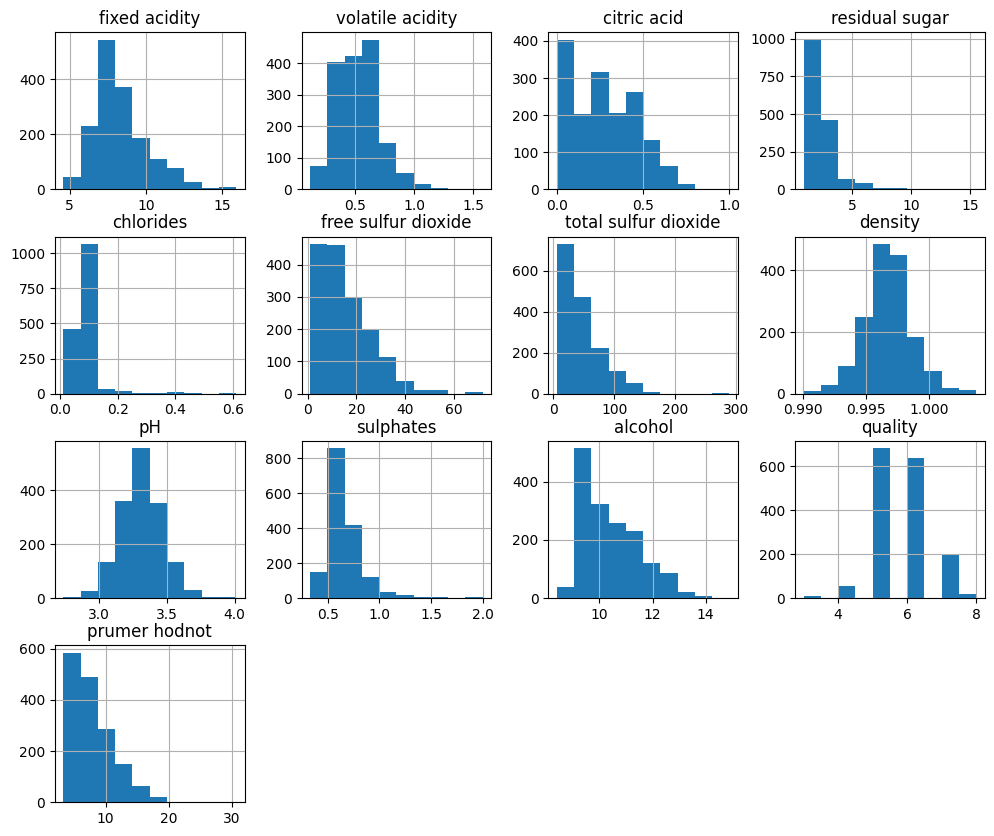

In [76]:
df['prumer hodnot'] = df.mean(axis=1)
df.hist(figsize=(12,10))

Text(0.5, 1.0, 'Quality by alcohol')

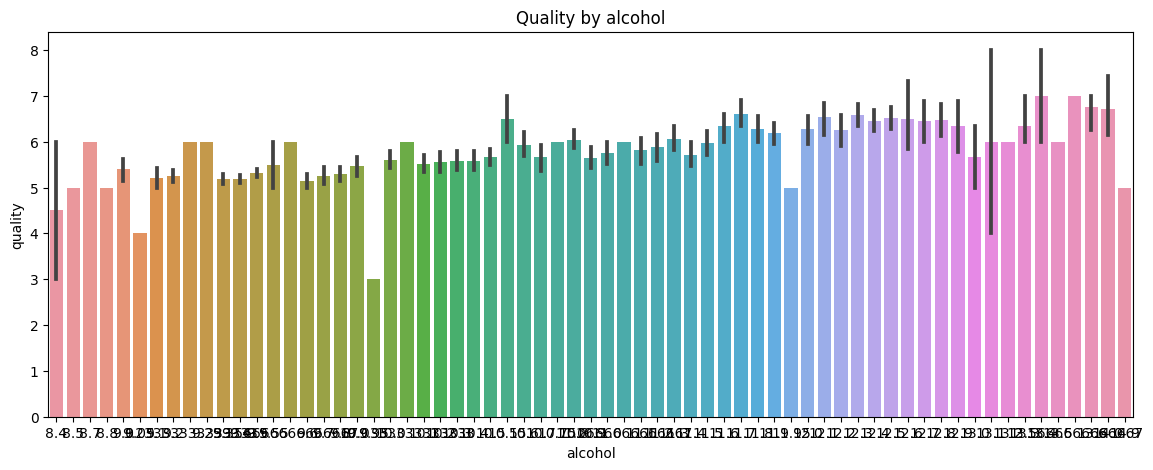

In [77]:
df[['alcohol', 'quality']].groupby('alcohol', as_index = False).mean().sort_values(by = 'quality', ascending = False, ignore_index = True)

#piktogram
plt.figure(figsize = (14, 5))
sns.barplot(x = 'alcohol', y = 'quality', data = df)
plt.title('Quality by alcohol')

Text(0.5, 1.0, 'Quality by density')

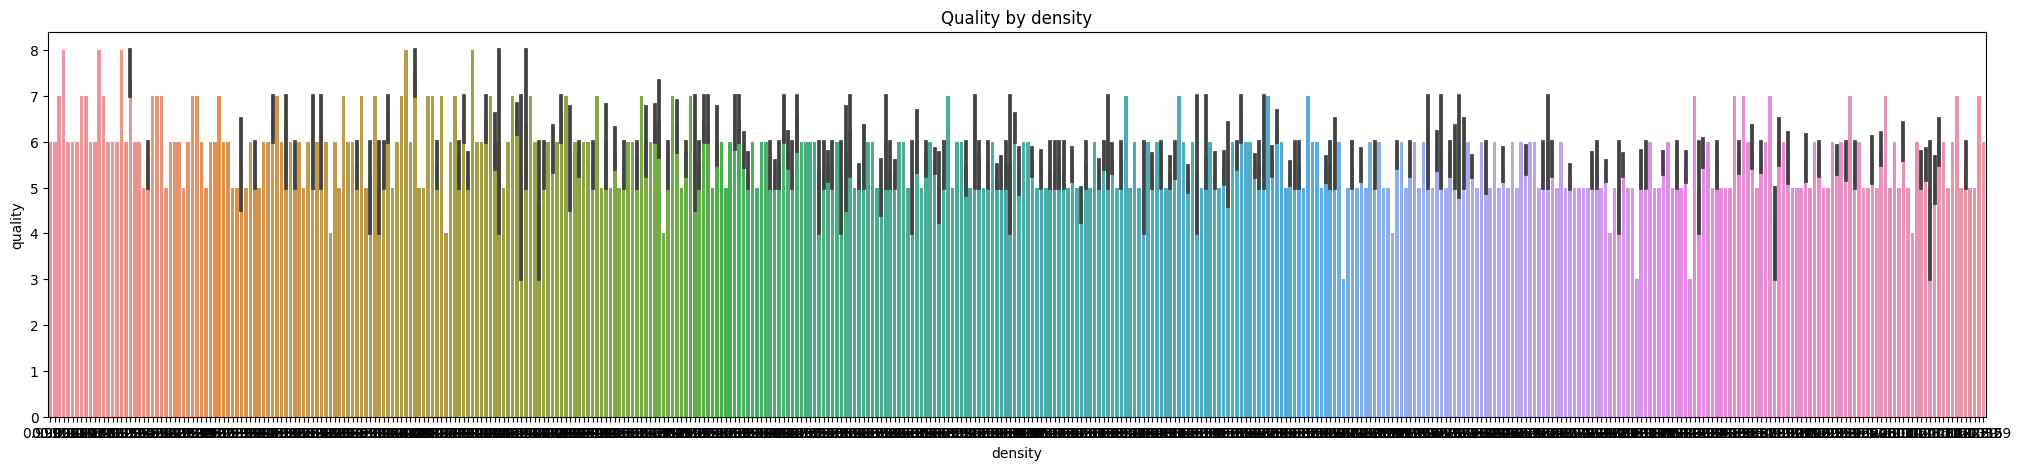

In [78]:
df[['density', 'quality']].groupby('density', as_index = False).mean().sort_values(by = 'quality', ascending = False, ignore_index = True)
#piktogram
plt.figure(figsize = (25, 5))
sns.barplot(x = 'density', y = 'quality', data = df)
plt.title('Quality by density')

Text(0.5, 1.0, 'Quality by residual sugar')

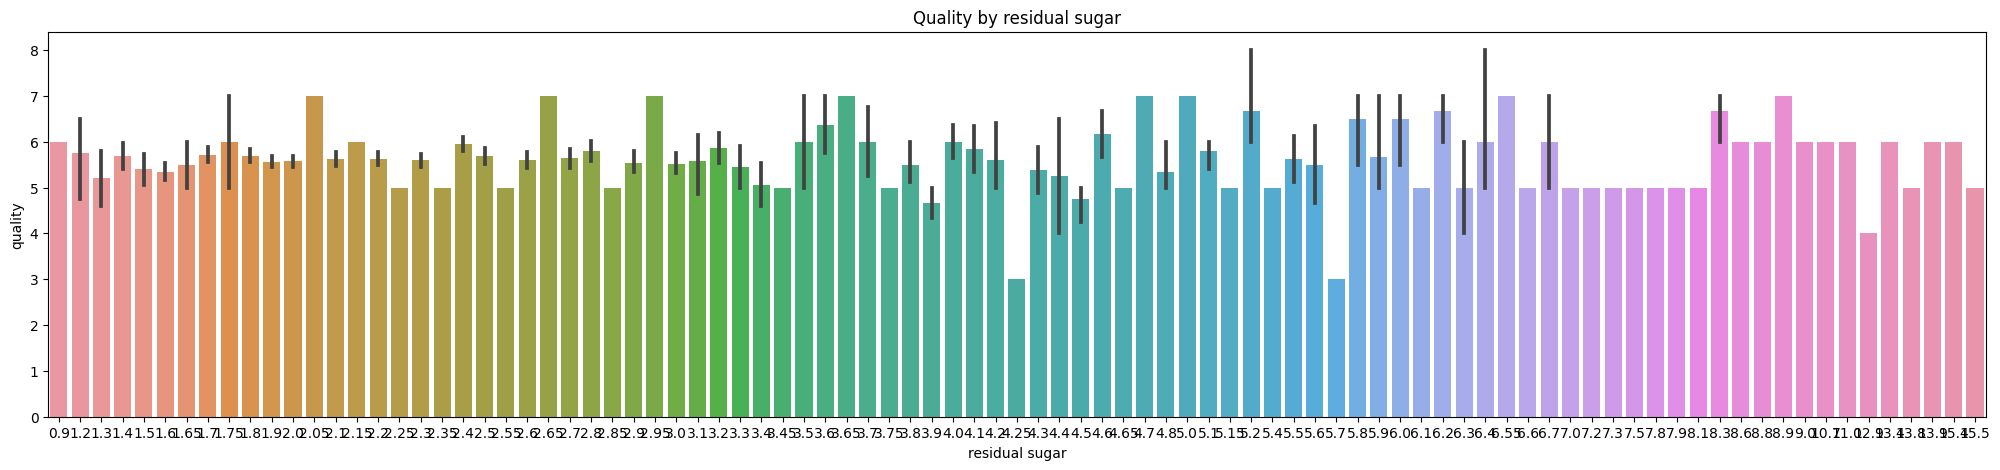

In [79]:
df[['residual sugar', 'quality']].groupby('residual sugar', as_index = False).mean().sort_values(by = 'quality', ascending = False, ignore_index = True)
#piktogram
plt.figure(figsize = (25, 5))
sns.barplot(x = 'residual sugar', y = 'quality', data = df)
plt.title('Quality by residual sugar')

Text(0.5, 1.0, 'Quality by citric acid')

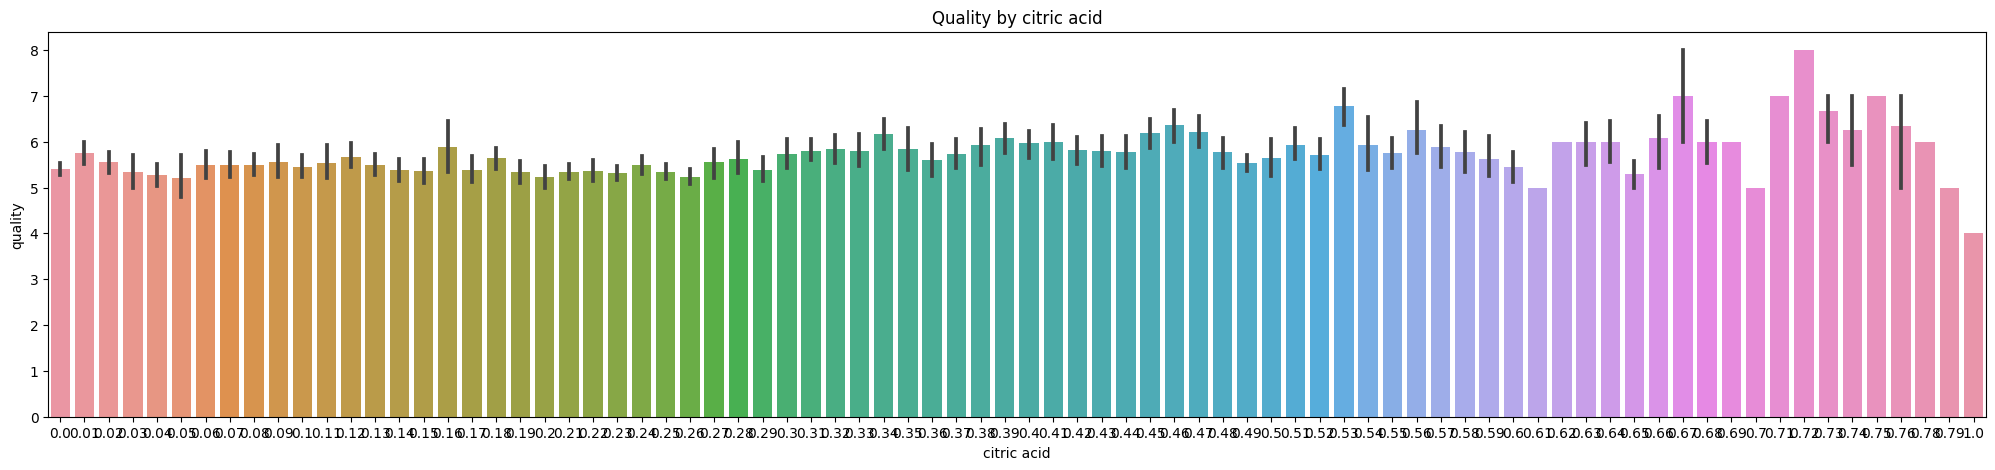

In [80]:
df[['citric acid', 'quality']].groupby('citric acid', as_index = False).mean().sort_values(by = 'quality', ascending = False, ignore_index = True)
#piktogram
plt.figure(figsize = (25, 5))
sns.barplot(x = 'citric acid', y = 'quality', data = df)
plt.title('Quality by citric acid')

In [81]:
# split data into training and testing sets
input_features = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", 
                  "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol"]
target_feature = "quality"
X_train, X_test, Y_train, Y_test = train_test_split(df[input_features], df[target_feature], test_size=0.2, random_state = 42)
print(len(X_train))
print(len(X_test))

1279
320


In [82]:
# build neural network model
model = Sequential()
model.add(Dense(32, input_dim=11, activation='tanh'))
model.add(Dense(1, activation='linear'))

In [83]:
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [84]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [85]:
# train the model
model.fit(X_train, Y_train, epochs=100, validation_split=0.2, verbose=0)

In [86]:
# evaluate the model on the test set
test_loss, test_mae = model.evaluate(X_test, Y_test, verbose=0)
print(f"Test Mean Absolute Error: {test_mae:.2f}")
print(f"Test Mean Squared Error: {test_loss:.2f}")

Test Mean Absolute Error: 0.53
Test Mean Squared Error: 0.44


In [87]:
# Define the new data to predict on
new_data = pd.DataFrame({
    'fixed acidity': [7.2],
    'volatile acidity': [0.34],
    'citric acid': [0.56],
    'residual sugar': [2.3],
    'chlorides': [0.02],
    'free sulfur dioxide': [23],
    'total sulfur dioxide': [58],
    'density': [0.9902],
    'pH': [3.08],
    'sulphates': [0.64],
    'alcohol': [10.5]
})

# Make predictions on the new data
predictions = model.predict(new_data)

# Print the predicted wine quality
print(predictions[0])

1/1 [==============================] - 0s 48ms/step
[5.897273]
